In [19]:
import pandas as pd
import torch
from monai.metrics import MAEMetric

test = "/data/sama/Deep_Learning_Pipeline/QQQQQQQ/experiments_dose/test/20240820_101012_341_Dual_DCNN_LReLu_0_2_tr_7.078_val_8.4_test_7.433_avg_tr_7.078_val_8.4_test_7.433/Dual_DCNN_LReLu_test_outputs.csv"

data = pd.read_csv(test, delimiter=';')
pred = data[['pred_0', 'pred_1', 'pred_2']]
true = data[['true_0', 'true_1', 'true_2']]
concatenated_pred = pred.values.flatten()
concatenated_true = true.values.flatten()

mse_value = MAEMetric(concatenated_pred, concatenated_true)
mse_value

In [32]:
import pandas as pd
import torch
from monai.metrics import MAEMetric  # Use MSEMetric from MONAI

# Load the CSV file using the correct delimiter (semicolon)
test = "/data/sama/Deep_Learning_Pipeline_Test/experiments_dose/test/20240828_060815_5_505_Dual_DCNN_LReLu_4_120_tr_1.057_val_1.462_test_2.676_avg_tr_1.024_val_2.116_test_2.997/Dual_DCNN_LReLu_test_outputs.csv"
data = pd.read_csv(test, delimiter=';')

# Select the columns 'pred_0', 'pred_1', 'pred_2' and 'true_0', 'true_1', 'true_2'
pred = data[['pred_0', 'pred_1', 'pred_2']]
true = data[['true_0', 'true_1', 'true_2']]

# Convert each row into a list of tensors
pred_list = [torch.tensor(row, dtype=torch.float32).unsqueeze(0) for row in pred.values]
true_list = [torch.tensor(row, dtype=torch.float32).unsqueeze(0) for row in true.values]

# Initialize MSE metric from MONAI
mse_metric = MAEMetric(reduction="none")  # We want individual values, not averaged

# Calculate MSE for each pair of predicted and true values
mse_values = [mse_metric([p], [t]) for p, t in zip(pred_list, true_list)]

# Convert the list of tensors to a list of values
mse_list = [mse.item() for mse in mse_values]

# Convert the mse_list to a PyTorch tensor to calculate the mean
mse_tensor = torch.tensor(mse_list)

# Calculate the mean of the MSE values
mse_mean = mse_tensor.mean().item()

# Print the list of MSE values and the mean
print(f"MSE values (list): {mse_list}")
print(f"Mean MSE: {mse_mean}")


MSE values (list): [2.287770986557007, 1.388901710510254, 0.8391576409339905, 1.0951414108276367, 1.8512340784072876, 2.1150124073028564, 2.0166499614715576, 1.7610355615615845, 2.883293867111206, 3.2244083881378174, 3.483407974243164, 1.3493744134902954, 2.1692888736724854, 1.3909586668014526, 2.503188371658325, 1.548622488975525, 2.5976128578186035, 1.8572736978530884, 1.6230268478393555, 3.0942318439483643, 3.5031330585479736, 1.4748226404190063, 2.2117815017700195, 2.5808160305023193, 1.4915714263916016, 1.2716313600540161, 2.6994447708129883, 1.231973648071289, 1.7565006017684937, 2.2989535331726074, 1.7612881660461426, 1.5059367418289185, 3.2853519916534424, 2.1402997970581055, 2.5393409729003906, 3.4014499187469482, 2.441518545150757, 2.898893117904663, 1.9879727363586426, 0.9652506709098816, 2.245393753051758, 3.4391868114471436, 2.5651657581329346, 3.561816453933716, 1.8513175249099731, 2.3816208839416504, 1.3807868957519531, 2.0019986629486084, 3.580439329147339, 2.4847636222

In [33]:
len(mse_list)

320

In [1]:
##############################################
# NOTE: Reviewing Samaneh Shapouri code.
# In this review, I will add some notes and questions.
# ########## Major Questions & Impressions ##########
# 1. Unstructured program (Lack of vital parts)
# 2. Where is your configuration file?
# 3. What arameters are you going to tunning?
# 4. What library did you use for hyperparameter tunning?
# 5. why didn't use ensemble model for this amount of data?
# 6. Did you try mini-batch processing?
# 7. To install GPU, one can use https://discuss.pytorch.org/t/install-pytorch-with-cuda-12-1/174294/5
#    approach. (5th answer)


##############################################

import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm
import json
# from dual_network import Dual3DCNN3, Dual3DCNN4, Dual3DCNN5, Sama3DCNN4, Dual3DCNN4_A # NOTE:This model was used in the last iteration
import torch
from torch.utils.data import Dataset
import SimpleITK as sitk
import numpy as np
import glob
# from utilities import create_list_from_master_json, read_json_file, split_data
import re
import glob
import random
from torch.utils.data import Dataset, DataLoader
import numpy as np
import SimpleITK as sitk
import torch
# from utilities import list_patient_folders, prepare_data_nrrd, split_data
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, Spacingd, ScaleIntensityd, SpatialPadd, CenterSpatialCropd, ScaleIntensityRanged
from monai.data import CacheDataset, DataLoader, Dataset
from monai.transforms import LoadImaged
from monai.data.image_reader import ITKReader
from monai.data import SmartCacheDataset
import random
# from utilities import list_patient_folders, prepare_data_nrrd, split_data, prepare_data_nrrd_for_CT
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from monai.transforms import NormalizeIntensityd
from optuna.trial import TrialState
import functools
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler, autocast
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, NormalizeIntensityd, 
    Spacingd, SpatialPadd, CenterSpatialCropd, RandWeightedCropd,
    EnsureTyped, MapTransform, ToDeviced, Rand3DElasticd)

from monai.data import (
                        Dataset, CacheDataset, PersistentDataset,
                        DataLoader, ThreadDataLoader, ITKReader
                        )

In [2]:
def prepare_data_nrrd_for_CT(data_dir, patient_ids):
    pct_paths = []
    rct_paths = []
    reg_pos = []

    # Load the JSON data
    with open(os.path.join(data_dir, 'file_info.json'), 'r') as json_file:  
        nrrd_info = json.load(json_file)
    
    # print(nrrd_info)
    for patient in nrrd_info:
        if patient['id'] in patient_ids:
            for examination_detail in patient['examination_details']:
                # Paths for planning CT and repeated CT
                planning_ct_path = os.path.join(data_dir, patient['id'], examination_detail['planningCT_filename'])
                planning_ct_path = planning_ct_path.replace('/data/shahpouriz/Processed_CT/nrrd', '/data/bahrdoh/CT_Model/Test')
                repeated_ct_path = os.path.join(data_dir, patient['id'], examination_detail['repeatedCT_filename'])
                repeated_ct_path = repeated_ct_path.replace('/data/shahpouriz/Processed_CT/nrrd', '/data/bahrdoh/CT_Model/Test')
                
                
                # Append paths if they exist
                if os.path.exists(planning_ct_path) and os.path.exists(repeated_ct_path):
                    pct_paths.append(planning_ct_path)
                    rct_paths.append(repeated_ct_path)
                    
                    # Append registration position
                    reg_pos.append([
                        examination_detail['final_translation_coordinate']['z'],
                        examination_detail['final_translation_coordinate']['y'],
                        examination_detail['final_translation_coordinate']['x']
                    ])
    
    reg_pos_array = np.array(reg_pos, dtype=np.float32)

    return pct_paths, rct_paths, reg_pos_array


def list_patient_folders(data_path):
    """
    List all directories in the base_directory.
    Each directory represents a patient.
    """
    try:
        patient_folders = [name for name in os.listdir(data_path)
                           if os.path.isdir(os.path.join(data_path, name))]
        return patient_folders
    except FileNotFoundError:
        print(f"Directory {data_path} was not found.")
        return []


In [3]:

root = '/data/bahrdoh/Deep_Learning_Pipeline_Dose/experiments_dose/test/20240722_191053_410_Dual_DCNN_LReLu_1_149_tr_0.988_val_3.565_test_3.683_avg_tr_1.018_val_4.223_test_4.064/'
test = root + 'Dual_DCNN_LReLu_test_outputs.csv'
val = root + 'Dual_DCNN_LReLu_val_outputs.csv'
train = root + 'Dual_DCNN_LReLu_train_outputs.csv'

df_train = pd.read_csv(train,  delimiter=';')
df_val = pd.read_csv(val,  delimiter=';')
df_test = pd.read_csv(test,  delimiter=';')


df_test = df_test.drop(columns=['Mode'])

df_test[['pred_0', 'pred_1', 'pred_2', 'true_0', 'true_1', 'true_2']] = df_test[['pred_0', 'pred_1', 'pred_2', 'true_0', 'true_1', 'true_2']].round(4)

# Remove "DBP_" from the 'PatientID' column
df_test['PatientID'] = df_test['PatientID'].str.replace('DBP_', '')


df_test.head()

,PatientID,pred_0,pred_1,pred_2,true_0,true_1,true_2
0,OP022,-2.7341,-10.5016,-13.2835,1.6193,-9.0774,-11.0897
1,OP022,7.7166,5.2311,-2.0864,11.4696,7.2543,4.8868
2,OP022,8.3289,6.2121,-3.9654,11.6152,8.8563,0.2965
3,OP022,-11.0649,-11.8870,7.2361,-10.9469,-11.5725,12.9280
4,OP022,-1.0475,-2.8834,1.2530,3.3624,-1.9916,11.1253


In [4]:
# Calculate the differences between predicted and true values
df_test['diff_0'] = df_test['pred_0'] - df_test['true_0']
df_test['diff_1'] = df_test['pred_1'] - df_test['true_1']
df_test['diff_2'] = df_test['pred_2'] - df_test['true_2']

# Display the updated DataFrame
df_test.head()

,PatientID,pred_0,pred_1,pred_2,true_0,true_1,true_2,diff_0,diff_1,diff_2
0,OP022,-2.7341,-10.5016,-13.2835,1.6193,-9.0774,-11.0897,-4.3534,-1.4242,-2.1938
1,OP022,7.7166,5.2311,-2.0864,11.4696,7.2543,4.8868,-3.7530,-2.0232,-6.9732
2,OP022,8.3289,6.2121,-3.9654,11.6152,8.8563,0.2965,-3.2863,-2.6442,-4.2619
3,OP022,-11.0649,-11.8870,7.2361,-10.9469,-11.5725,12.9280,-0.1180,-0.3145,-5.6919
4,OP022,-1.0475,-2.8834,1.2530,3.3624,-1.9916,11.1253,-4.4099,-0.8918,-9.8723


In [5]:
len(df_test)

320

In [6]:
{df_test['PatientID'][i]: abs(df_test['diff_0'][i]) for i in range(len(df_test))}

{'OP022': 2.0589000000000013,
 'OP029': 2.3847000000000005,
 'OP059': 4.2569,
 'OP032': 1.1624,
 'OP038': 1.7518}

In [7]:
for i in range(len(df_test)):
    print(df_test['PatientID'][i], df_test['diff_0'][i])

OP022 -4.353400000000001
OP022 -3.753
OP022 -3.286299999999999
OP022 -0.11800000000000033
OP022 -4.4099
OP022 -2.5561000000000007
OP022 -2.7470999999999997
OP022 -0.7976999999999999
OP022 0.9677000000000002
OP022 1.7825
OP022 -4.1851
OP022 -1.2147999999999999
OP022 -4.3764
OP022 -0.5816999999999997
OP022 -0.20350000000000001
OP022 -1.5103000000000009
OP022 -4.4735000000000005
OP022 -3.1837
OP022 1.7026
OP022 -0.383
OP022 -0.7131999999999998
OP022 -0.8867
OP022 -5.1258
OP022 2.9791
OP022 -2.2801
OP022 -0.9589
OP022 -1.5284999999999993
OP022 -4.3911
OP022 -4.4291
OP022 0.38029999999999986
OP022 -2.7938000000000005
OP022 -2.0204
OP022 -2.7697000000000003
OP022 0.16749999999999954
OP022 -5.6641
OP022 2.6636
OP022 -6.2806
OP022 -2.2963999999999993
OP022 -0.6905000000000001
OP022 -3.1478
OP022 -7.947499999999999
OP022 -2.3842999999999996
OP022 3.8301000000000007
OP022 2.1251
OP022 -0.8350000000000009
OP022 -3.913499999999999
OP022 -2.7367
OP022 -4.7671
OP022 -5.290900000000001
OP022 -3.1375


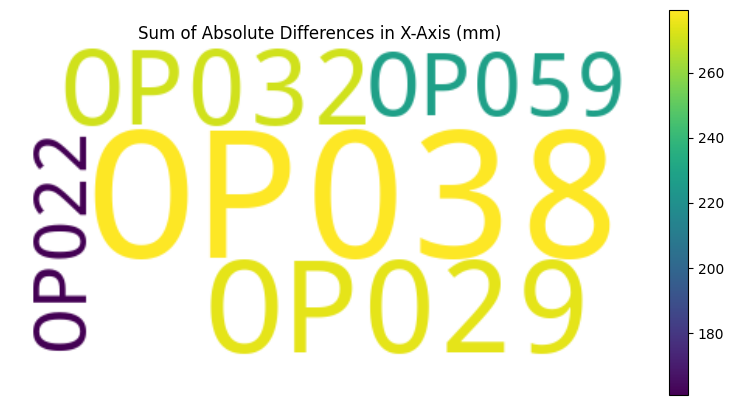

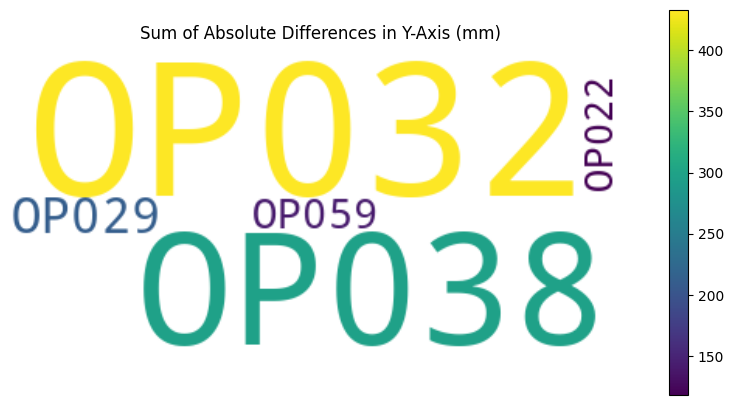

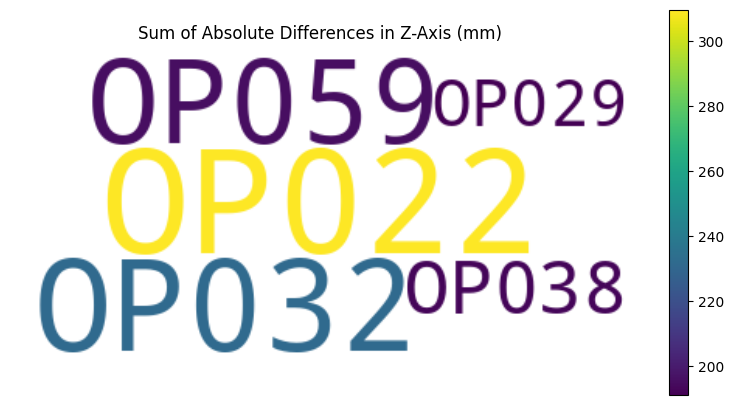

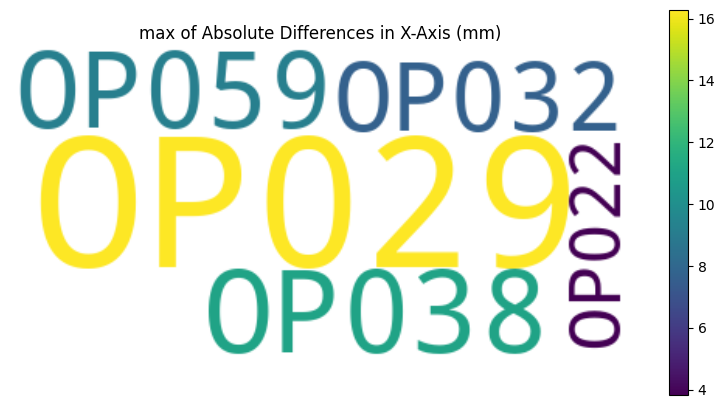

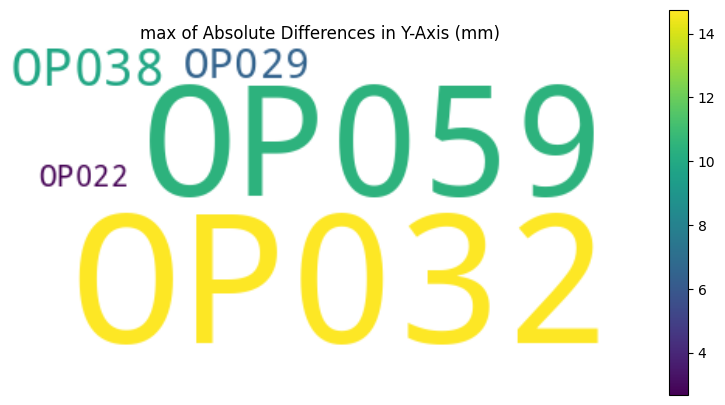

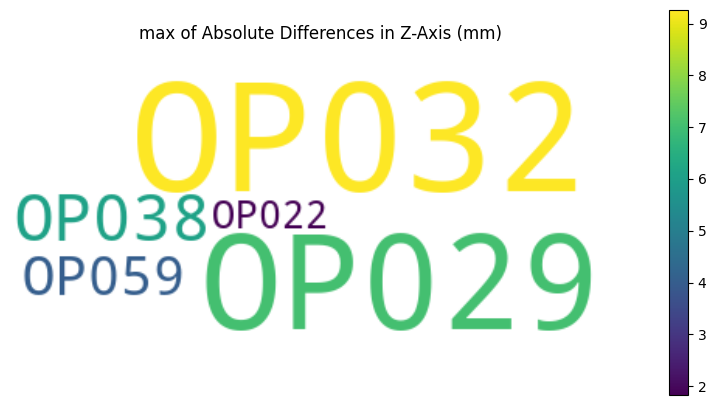

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Function to generate a word cloud with colors based on the values
def plot_colored_wordcloud(data_dict, title):
    # Normalize the values to a range between 0 and 1
    min_val = min(data_dict.values())
    max_val = max(data_dict.values())
    norm_values = {k: (v - min_val) / (max_val - min_val) for k, v in data_dict.items()}
    
    # Define a colormap
    colormap = plt.cm.viridis
    
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(data_dict)
    
    # Recolor the word cloud
    def color_func(word, *args, **kwargs):
        return mcolors.to_hex(colormap(norm_values[word]))

    wordcloud = wordcloud.recolor(color_func=color_func)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_val, vmax=max_val)), ax=plt.gca(), orientation='vertical')
    plt.show()

# Example data for one dimension (replace with actual data)
sum_diff_0 = df_test.groupby('PatientID')['diff_0'].apply(lambda x: abs(x).sum()).to_dict()
sum_diff_1 = df_test.groupby('PatientID')['diff_1'].apply(lambda x: abs(x).sum()).to_dict()
sum_diff_2 = df_test.groupby('PatientID')['diff_2'].apply(lambda x: abs(x).sum()).to_dict()

max_diff_0 = df_test.groupby('PatientID')['diff_0'].apply(lambda x: max(x)).to_dict()
max_diff_1 = df_test.groupby('PatientID')['diff_1'].apply(lambda x: max(x)).to_dict()
max_diff_2 = df_test.groupby('PatientID')['diff_2'].apply(lambda x: max(x)).to_dict()

# Plotting the word clouds with colors representing differences
plot_colored_wordcloud(sum_diff_0, 'Sum of Absolute Differences in X-Axis (mm)')
plot_colored_wordcloud(sum_diff_1, 'Sum of Absolute Differences in Y-Axis (mm)')
plot_colored_wordcloud(sum_diff_2, 'Sum of Absolute Differences in Z-Axis (mm)')

plot_colored_wordcloud(max_diff_0, 'max of Absolute Differences in X-Axis (mm)')
plot_colored_wordcloud(max_diff_1, 'max of Absolute Differences in Y-Axis (mm)')
plot_colored_wordcloud(max_diff_2, 'max of Absolute Differences in Z-Axis (mm)')

----------------
# Euclidean Distance

 If your goal is to measure the absolute spatial error or displacement between predicted and actual points, Euclidean distance is likely the best choice.

In [9]:
# Calculate Euclidean distances
df_test['euclidean_dist'] = np.sqrt(df_test['diff_0']**2 + df_test['diff_1']**2 + df_test['diff_2']**2)


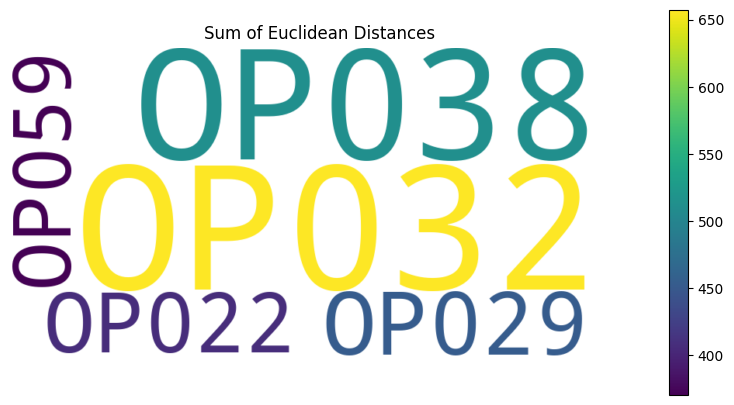

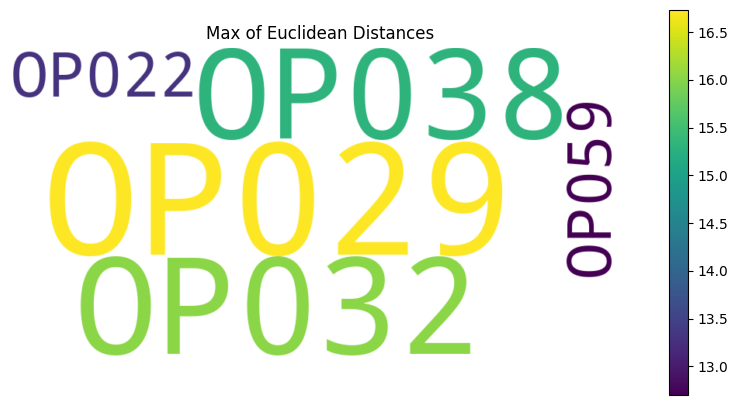

In [10]:
# Option 1: Sum of Euclidean distances for each PatientID
sum_dist = df_test.groupby('PatientID')['euclidean_dist'].sum().to_dict()

# Option 2: Maximum Euclidean distance for each PatientID
max_dist = df_test.groupby('PatientID')['euclidean_dist'].max().to_dict()

# Function to plot word cloud with colors
def plot_colored_wordcloud(data_dict, title):
    # Normalize the values to a range between 0 and 1
    min_val = min(data_dict.values())
    max_val = max(data_dict.values())
    norm_values = {k: (v - min_val) / (max_val - min_val) for k, v in data_dict.items()}
    
    # Define a colormap
    colormap = plt.cm.viridis
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_dict)
    
    # Recolor the word cloud
    def color_func(word, *args, **kwargs):
        return mcolors.to_hex(colormap(norm_values[word]))

    wordcloud = wordcloud.recolor(color_func=color_func)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_val, vmax=max_val)), ax=plt.gca(), orientation='vertical')
    plt.show()

# Plotting the word clouds for Euclidean distances
plot_colored_wordcloud(sum_dist, 'Sum of Euclidean Distances')
plot_colored_wordcloud(max_dist, 'Max of Euclidean Distances')

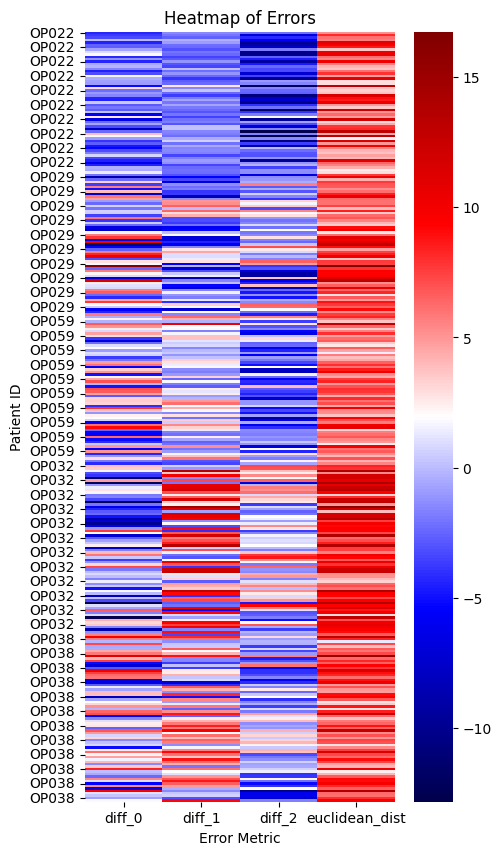

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_test contains the calculated differences and Euclidean distance for each row
# Add absolute differences columns if not already added
df_test['diff_0'] = df_test['diff_0']
df_test['diff_1'] = df_test['diff_1']
df_test['diff_2'] = df_test['diff_2']

# Prepare the data for the heatmap visualization
# Each row will be represented by the PatientID and the error metrics
heatmap_data = df_test[['PatientID', 'diff_0', 'diff_1', 'diff_2', 'euclidean_dist']]

# Plotting the heatmap for all rows
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data.set_index('PatientID'), annot=False, cmap='seismic', linewidths=0.0)
plt.title('Heatmap of Errors')
plt.xlabel('Error Metric')
plt.ylabel('Patient ID')
plt.show()


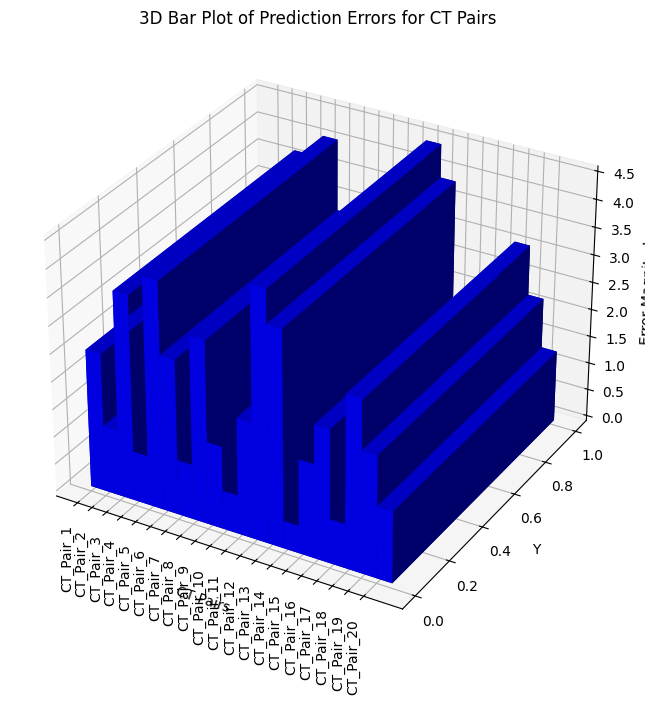

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace with your actual CT pair names and their corresponding errors
ct_pairs = ['CT_Pair_{}'.format(i) for i in range(1, 21)]
errors = [2.5, 1.2, 3.7, 0.9, 4.1, 2.8, 1.0, 3.3, 1.5, 0.7, 2.1, 4.5, 3.9, 0.5, 1.7, 2.4, 0.8, 3.1, 2.2, 1.3]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate bar plot
x_pos = np.arange(len(ct_pairs))
y_pos = np.zeros(len(ct_pairs))
z_pos = np.zeros(len(ct_pairs))
dx = np.ones(len(ct_pairs))
dy = np.ones(len(ct_pairs))
dz = errors

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='b', zsort='average')

ax.set_xlabel('CT Pairs')
ax.set_ylabel('Y')
ax.set_zlabel('Error Magnitude')
ax.set_xticks(x_pos)
ax.set_xticklabels(ct_pairs, rotation=90)
plt.title("3D Bar Plot of Prediction Errors for CT Pairs")

plt.show()


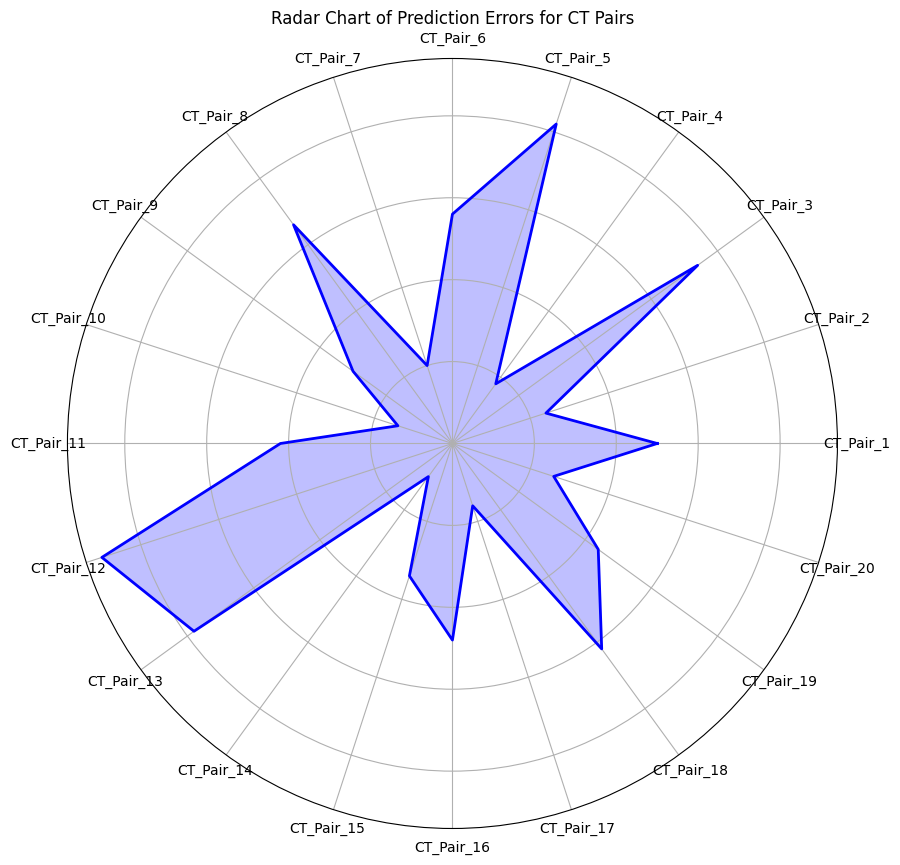

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace with your actual CT pair names and their corresponding errors
ct_pairs = ['CT_Pair_{}'.format(i) for i in range(1, 21)]
errors = [2.5, 1.2, 3.7, 0.9, 4.1, 2.8, 1.0, 3.3, 1.5, 0.7, 2.1, 4.5, 3.9, 0.5, 1.7, 2.4, 0.8, 3.1, 2.2, 1.3]

# Number of variables
num_vars = len(ct_pairs)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
errors += errors[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, errors, color='blue', alpha=0.25)
ax.plot(angles, errors, color='blue', linewidth=2)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(ct_pairs, rotation=90)

plt.title("Radar Chart of Prediction Errors for CT Pairs")
plt.show()


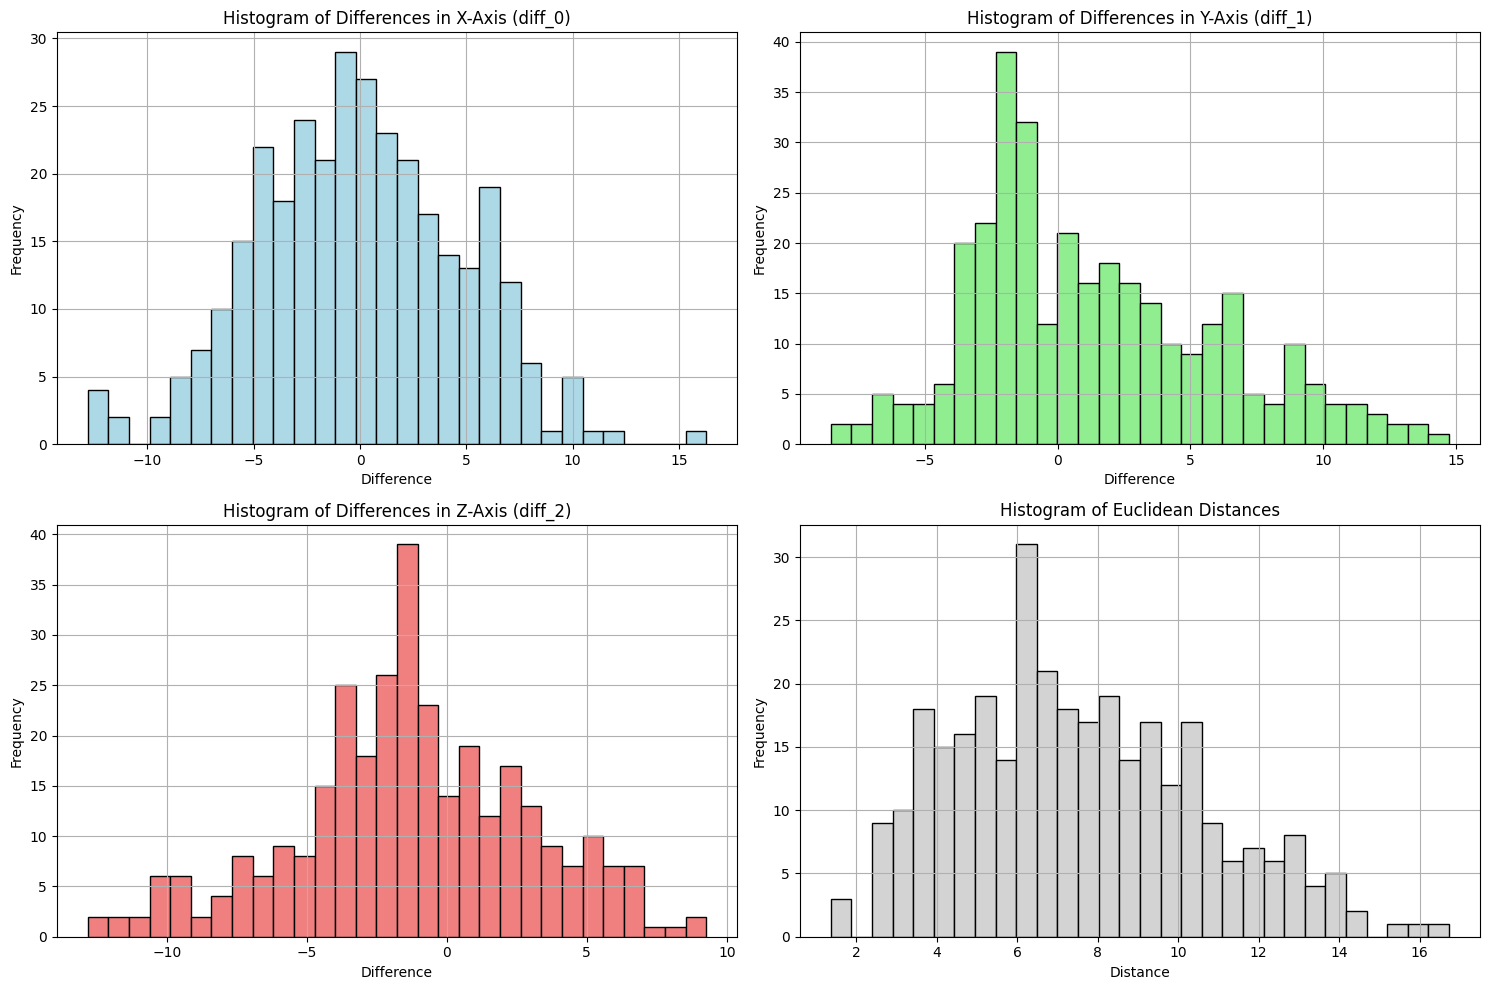

In [14]:
import matplotlib.pyplot as plt

# Assuming df_test contains the calculated differences for each row

# Plotting histograms for each set of differences separately
plt.figure(figsize=(15, 10))

# Histogram for X-axis differences (diff_0)
plt.subplot(2, 2, 1)
plt.hist(df_test['diff_0'], bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Differences in X-Axis (diff_0)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Y-axis differences (diff_1)
plt.subplot(2, 2, 2)
plt.hist(df_test['diff_1'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Differences in Y-Axis (diff_1)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Z-axis differences (diff_2)
plt.subplot(2, 2, 3)
plt.hist(df_test['diff_2'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Differences in Z-Axis (diff_2)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Euclidean distances
plt.subplot(2, 2, 4)
plt.hist(df_test['euclidean_dist'], bins=30, color='lightgrey', edgecolor='black')
plt.title('Histogram of Euclidean Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


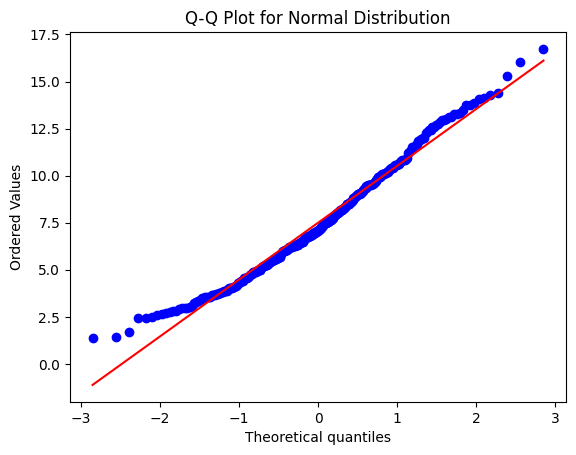

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming df_test contains the Euclidean distances or other differences
data = df_test['euclidean_dist']

# Q-Q plot for normal distribution
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normal Distribution")
plt.show()


In [16]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p = shapiro(data)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)

if p > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")


Shapiro-Wilk Test Statistic: 0.9803060517708005
p-value: 0.000222745590933175
Data is not normally distributed


In [17]:
from scipy.stats import kstest

# Perform K-S test against a normal distribution
stat, p = kstest(data, 'norm', args=(data.mean(), data.std()))
print('K-S Test Statistic:', stat)
print('p-value:', p)

if p > 0.05:
    print("Data is similar to a normal distribution")
else:
    print("Data is not similar to a normal distribution")


K-S Test Statistic: 0.057078882749445836
p-value: 0.2388790446801462
Data is similar to a normal distribution


In [18]:
from scipy.stats import skew, kurtosis

skewness = skew(data)
kurt = kurtosis(data)
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


Skewness: 0.4289018514478464
Kurtosis: -0.340991948201121


Interpretation:
Normal Distribution: A normal Q-Q plot will show points falling on a straight line. Shapiro-Wilk, K-S, or other tests will have a high p-value (typically > 0.05), indicating normality.
Poisson Distribution: Q-Q plots and specific tests (not shown above) can check for Poisson characteristics. The data will often exhibit integer counts with variance close to the mean.
Other Distributions: Fit the data to different distributions and compare using AIC/BIC to find the best fit.

************************************************************

 The results you've provided from various statistical tests and measures offer insight into the distribution of your data. Here's the interpretation:

1. Shapiro-Wilk Test:
Statistic: 0.9803
p-value: 0.00022
The Shapiro-Wilk test is a common test for normality. The null hypothesis of the test is that the data is normally distributed. In this case, the p-value is significantly less than 0.05, leading us to reject the null hypothesis. Therefore, according to the Shapiro-Wilk test, the data does not follow a normal distribution.

2. Kolmogorov-Smirnov (K-S) Test:
Statistic: 0.0571
p-value: 0.2388
The K-S test compares the sample data with a reference probability distribution (here, a normal distribution). The null hypothesis is that the sample follows the reference distribution. The p-value is greater than 0.05, which means we do not reject the null hypothesis. Thus, according to the K-S test, there is no significant evidence to say that the data is not normally distributed.

3. Skewness:
Value: 0.4289
Skewness measures the asymmetry of the distribution. A skewness close to 0 indicates a symmetric distribution. Positive skewness (0.4289) suggests a slight right-skew (tail on the right side), meaning there are a few unusually high values.

4. Kurtosis:
Value: -0.3410
Kurtosis measures the "tailedness" of the distribution. A normal distribution has a kurtosis of 0. Negative kurtosis (platykurtic) indicates that the data has lighter tails than a normal distribution, suggesting fewer outliers.

Overall Interpretation:
The Shapiro-Wilk test indicates that the data is not normally distributed, as evidenced by the low p-value.
The K-S test, however, suggests that the data is similar to a normal distribution, though this conclusion might be less robust due to the test's sensitivity to sample size and differences between sample and population distributions.
The skewness and kurtosis values suggest that the data is slightly right-skewed with less prominent tails than a normal distribution.
Reconciling the Tests:

While the Shapiro-Wilk test indicates non-normality, the K-S test and the shape descriptors (skewness and kurtosis) do not strongly suggest significant deviations from normality. This discrepancy can arise from the tests' different sensitivities to various aspects of the data distribution. The K-S test, in particular, is not as sensitive to deviations in the tails as the Shapiro-Wilk test.

Conclusion:

While there are indications that the data does not perfectly follow a normal distribution (based on the Shapiro-Wilk test and slight skewness), the deviations are not extreme. Depending on your specific analysis requirements, you might consider treating the data as approximately normal, especially if your sample size is large, which can justify the use of normal-based methods due to the Central Limit Theorem. However, if precise normality is crucial, these results suggest that normality cannot be strictly assumed.

-------------

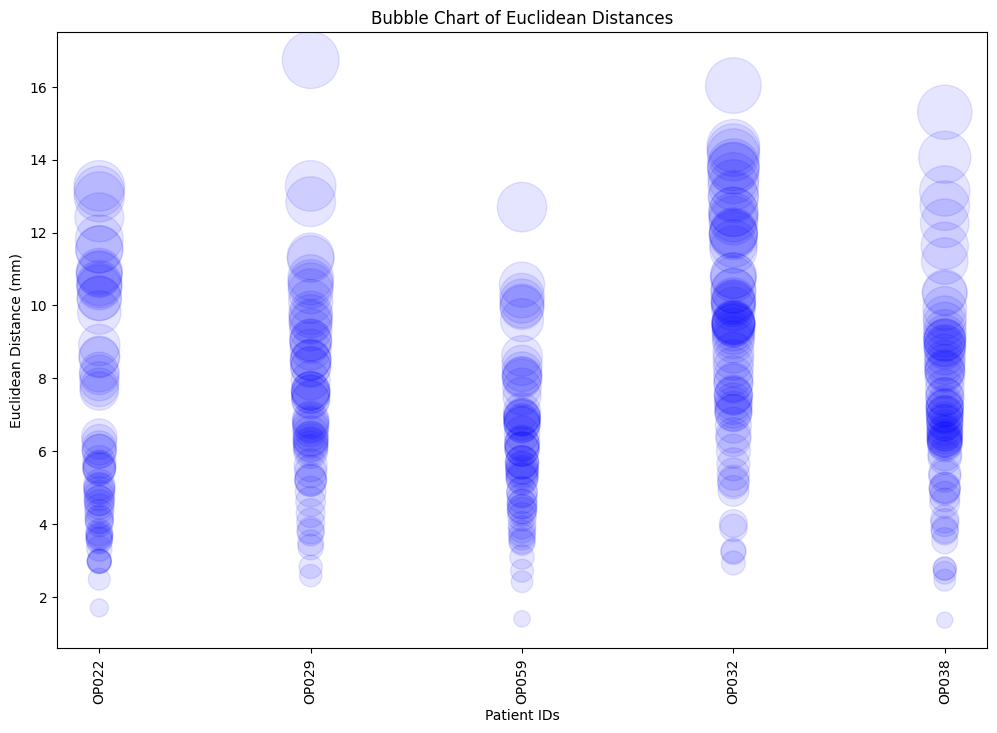

In [19]:
import matplotlib.pyplot as plt

# Example data: Replace with your actual patient IDs and their corresponding Euclidean distances
patient_ids = df_test['PatientID']
euclidean_distances = df_test['euclidean_dist']

# Generate bubble chart
plt.figure(figsize=(12, 8))
bubble_size = [distance * 100 for distance in euclidean_distances]  # Adjust the bubble size as needed
plt.scatter(patient_ids, euclidean_distances, s=bubble_size, alpha=0.1, c='blue')
plt.xticks(rotation=90)
plt.xlabel("Patient IDs")
plt.ylabel("Euclidean Distance (mm)")
plt.title("Bubble Chart of Euclidean Distances")
plt.show()


---------------------

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_test contains the calculated differences and PatientID for each row

# Define a function to find outliers based on the IQR method and return both values and indices
def find_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Find outliers for each difference and Euclidean distance
outliers_diff_0 = find_outliers(df_test, 'diff_0')
outliers_diff_1 = find_outliers(df_test, 'diff_1')
outliers_diff_2 = find_outliers(df_test, 'diff_2')
outliers_euclidean_dist = find_outliers(df_test, 'euclidean_dist')


In [21]:
outliers_diff_0

,PatientID,pred_0,pred_1,pred_2,true_0,true_1,true_2,diff_0,diff_1,diff_2,euclidean_dist
97,OP029,1.3048,5.5019,10.435,-14.9839,5.6683,14.2567,16.2887,-0.1664,-3.8217,16.731851


In [22]:
# Add a new column to each DataFrame indicating the type of difference
outliers_diff_0.loc[:, 'type'] = '0_dist'
outliers_diff_1.loc[:, 'type'] = '1_dist'
outliers_diff_2.loc[:, 'type'] = '2_dist'
outliers_euclidean_dist.loc[:, 'type'] = 'euclidean_dist'


# Concatenate all DataFrames into one unique DataFrame
outliers_df = pd.concat([outliers_diff_0, outliers_diff_1, outliers_diff_2, outliers_euclidean_dist])

# Reset the index for the combined DataFrame
outliers_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
outliers_df



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,PatientID,pred_0,pred_1,pred_2,true_0,true_1,true_2,diff_0,diff_1,diff_2,euclidean_dist,type
0,OP029,1.3048,5.5019,10.4350,-14.9839,5.6683,14.2567,16.2887,-0.1664,-3.8217,16.731851,0_dist
1,OP032,8.4925,0.5453,6.9723,14.7506,-14.1947,6.1552,-6.2581,14.7400,0.8171,16.034309,1_dist
2,OP022,7.5113,-7.7117,0.2069,12.6371,-10.3954,12.1621,-5.1258,2.6837,-11.9552,13.281675,2_dist
3,OP022,10.7131,4.4756,1.5729,13.0974,6.0369,14.3934,-2.3843,-1.5613,-12.8205,13.133460,2_dist
4,OP022,5.9980,11.1190,0.9849,3.8729,13.4229,13.5804,2.1251,-2.3039,-12.5955,12.979623,2_dist
5,OP029,1.3048,5.5019,10.4350,-14.9839,5.6683,14.2567,16.2887,-0.1664,-3.8217,16.731851,euclidean_dist
6,OP032,8.4925,0.5453,6.9723,14.7506,-14.1947,6.1552,-6.2581,14.7400,0.8171,16.034309,euclidean_dist


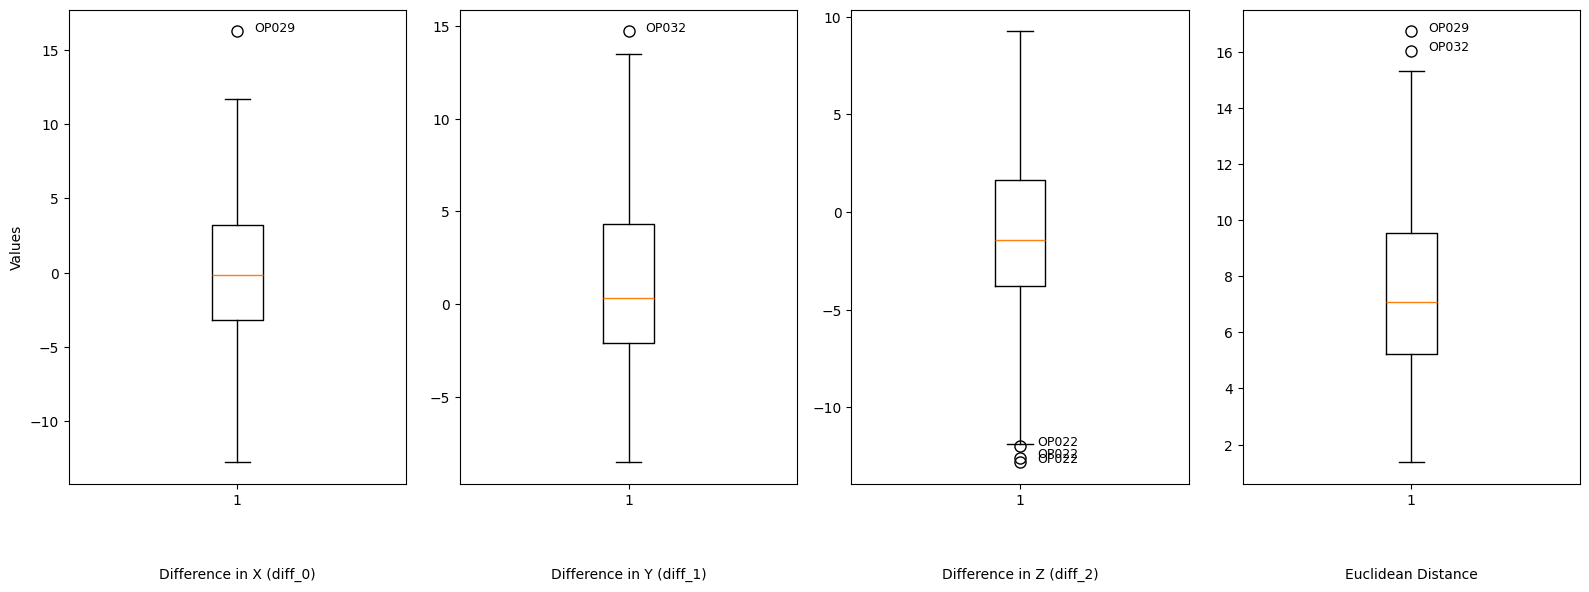

In [23]:
import matplotlib.pyplot as plt

def plot_boxplots_with_outliers(df_test, outliers_df):
    """
    Plots box plots with labeled outliers for the provided metrics.

    Parameters:
    - df_test: DataFrame containing the test data with metrics.
    - outliers_df: DataFrame containing the combined outliers data with the type of difference.
    """
    plt.figure(figsize=(16, 6))

    # Extract different types of outliers
    outliers_diff_0 = outliers_df[outliers_df['type'] == '0_dist']
    outliers_diff_1 = outliers_df[outliers_df['type'] == '1_dist']
    outliers_diff_2 = outliers_df[outliers_df['type'] == '2_dist']
    outliers_euclidean = outliers_df[outliers_df['type'] == 'euclidean_dist']

    # Box plot for diff_0
    plt.subplot(1, 4, 1)
    plt.boxplot(df_test['diff_0'], flierprops={'marker': 'o', 'color': 'red', 'markersize': 8})
    plt.text(0.5, -0.2, 'Difference in X (diff_0)', ha='center', transform=plt.gca().transAxes)
    plt.ylabel('Values')

    # Labeling outliers for diff_0
    for i, row in outliers_diff_0.iterrows():
        plt.text(1.05, row['diff_0'], row['PatientID'], fontsize=9)

    # Box plot for diff_1
    plt.subplot(1, 4, 2)
    plt.boxplot(df_test['diff_1'], flierprops={'marker': 'o', 'color': 'red', 'markersize': 8})
    plt.text(0.5, -0.2, 'Difference in Y (diff_1)', ha='center', transform=plt.gca().transAxes)

    # Labeling outliers for diff_1
    for i, row in outliers_diff_1.iterrows():
        plt.text(1.05, row['diff_1'], row['PatientID'], fontsize=9)

    # Box plot for diff_2
    plt.subplot(1, 4, 3)
    plt.boxplot(df_test['diff_2'], flierprops={'marker': 'o', 'color': 'red', 'markersize': 8})
    plt.text(0.5, -0.2, 'Difference in Z (diff_2)', ha='center', transform=plt.gca().transAxes)

    # Labeling outliers for diff_2
    for i, row in outliers_diff_2.iterrows():
        plt.text(1.05, row['diff_2'], row['PatientID'], fontsize=9)

    # Box plot for Euclidean distances
    plt.subplot(1, 4, 4)
    plt.boxplot(df_test['euclidean_dist'], flierprops={'marker': 'o', 'color': 'red', 'markersize': 8})
    plt.text(0.5, -0.2, 'Euclidean Distance', ha='center', transform=plt.gca().transAxes)

    # Labeling outliers for Euclidean distances
    for i, row in outliers_euclidean.iterrows():
        plt.text(1.05, row['euclidean_dist'], row['PatientID'], fontsize=9)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_boxplots_with_outliers(df_test, outliers_df)


In [24]:
import json
import numpy as np
import ast
# Load the JSON file
json_path = root + 'Data_dict_0.json'

with open(json_path, 'r') as f:
    data_dict = json.load(f)


# Extract the relevant fields from the JSON data into a DataFrame
json_df = pd.DataFrame(data_dict['test_dict'])

# Function to clean and convert position string to a list of floats
def clean_position_string(pos_str):
    pos_str = re.sub(r'\s+', ',', pos_str.strip('[] '))  # Replace spaces with commas and strip brackets
    return list(map(float, pos_str.split(',')))

# Apply cleaning function to the 'pos' column and expand it into separate columns
json_df['pos'] = json_df['pos'].apply(clean_position_string)
json_df[['true_0', 'true_1', 'true_2']] = pd.DataFrame(json_df['pos'].tolist(), index=json_df.index).round(4)



# Drop the 'pos' column as it's no longer needed
json_df = json_df.drop(columns=['pos'])

# Clean the 'pat_id' column by removing "DBP_"
json_df['PatientID'] = json_df['pat_id'].str.replace('DBP_', '')

# Drop the old 'pat_id' column as it's redundant
json_df = json_df.drop(columns=['pat_id'])

In [25]:
outliers_df

,PatientID,pred_0,pred_1,pred_2,true_0,true_1,true_2,diff_0,diff_1,diff_2,euclidean_dist,type
0,OP029,1.3048,5.5019,10.4350,-14.9839,5.6683,14.2567,16.2887,-0.1664,-3.8217,16.731851,0_dist
1,OP032,8.4925,0.5453,6.9723,14.7506,-14.1947,6.1552,-6.2581,14.7400,0.8171,16.034309,1_dist
2,OP022,7.5113,-7.7117,0.2069,12.6371,-10.3954,12.1621,-5.1258,2.6837,-11.9552,13.281675,2_dist
3,OP022,10.7131,4.4756,1.5729,13.0974,6.0369,14.3934,-2.3843,-1.5613,-12.8205,13.133460,2_dist
4,OP022,5.9980,11.1190,0.9849,3.8729,13.4229,13.5804,2.1251,-2.3039,-12.5955,12.979623,2_dist
5,OP029,1.3048,5.5019,10.4350,-14.9839,5.6683,14.2567,16.2887,-0.1664,-3.8217,16.731851,euclidean_dist
6,OP032,8.4925,0.5453,6.9723,14.7506,-14.1947,6.1552,-6.2581,14.7400,0.8171,16.034309,euclidean_dist


In [26]:
def find_paths_for_outliers(outliers_df, json_df):
    # Initialize new columns in outliers_df for storing paths
    outliers_df['fixed'] = None
    outliers_df['moving'] = None

    for index, outlier in outliers_df.iterrows():
        patient_id = outlier['PatientID']
        true_0, true_1, true_2 = outlier['true_0'], outlier['true_1'], outlier['true_2']

        # Select entries matching the patient ID and coordinates
        matching_entries = json_df[
            (json_df['PatientID'] == patient_id) &
            (np.isclose(json_df['true_0'], true_0, atol=1e-3)) &
            (np.isclose(json_df['true_1'], true_1, atol=1e-3)) &
            (np.isclose(json_df['true_2'], true_2, atol=1e-3))
        ]

        if matching_entries.empty:
            print(f"No match found for Patient ID: {patient_id} with coordinates {true_0, true_1, true_2}")
        elif len(matching_entries) > 1:
            print(f"Multiple matches found for Patient ID: {patient_id} with coordinates {true_0, true_1, true_2}")
        else:
            for _, entry in matching_entries.iterrows():
                outliers_df.at[index, 'fixed'] = entry['fixed']
                outliers_df.at[index, 'moving'] = entry['moving']
                break

    return outliers_df

# Finding matched paths using the function
outliers_df = find_paths_for_outliers(outliers_df, json_df)

# Display the updated DataFrame with paths
outliers_df.head()


,PatientID,pred_0,pred_1,pred_2,true_0,true_1,true_2,diff_0,diff_1,diff_2,euclidean_dist,type,fixed,moving
0,OP029,1.3048,5.5019,10.4350,-14.9839,5.6683,14.2567,16.2887,-0.1664,-3.8217,16.731851,0_dist,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...
1,OP032,8.4925,0.5453,6.9723,14.7506,-14.1947,6.1552,-6.2581,14.7400,0.8171,16.034309,1_dist,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP03...,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP03...
2,OP022,7.5113,-7.7117,0.2069,12.6371,-10.3954,12.1621,-5.1258,2.6837,-11.9552,13.281675,2_dist,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...
3,OP022,10.7131,4.4756,1.5729,13.0974,6.0369,14.3934,-2.3843,-1.5613,-12.8205,13.133460,2_dist,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...
4,OP022,5.9980,11.1190,0.9849,3.8729,13.4229,13.5804,2.1251,-2.3039,-12.5955,12.979623,2_dist,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...,/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP02...


In [27]:
import matplotlib.pyplot as plt
import itk
import numpy as np

# Function to transform the moving image based on given coordinates using ITK
def transform_moving_ct(moving_CT_image, fixed_CT_image, coordination, pixdim):
    if len(coordination) != 3:
        raise ValueError(f"Expected coordination of length 3, but got {len(coordination)}")

    # Set the spacing for the images
    fixed_CT_image.SetSpacing(pixdim)
    moving_CT_image.SetSpacing(pixdim)

    # Define the translation transformation
    translation_updated = itk.TranslationTransform[itk.D, 3].New()
    translation_updated.SetOffset(np.array(
                        [coordination[2], coordination[1], coordination[0]],dtype=np.float64))

    # Resample the moving image with the transformation
    resampler_updated = itk.ResampleImageFilter.New(
                        Input=moving_CT_image, Transform=translation_updated,
                        UseReferenceImage=True, ReferenceImage=fixed_CT_image)
    resampler_updated.SetInterpolator(itk.LinearInterpolateImageFunction.New(fixed_CT_image))

    resampler_updated.Update()
    transformed_moving_CT_image_updated = resampler_updated.GetOutput()
    transformed_moving_CT_array_updated = itk.array_view_from_image(transformed_moving_CT_image_updated)

    return transformed_moving_CT_array_updated


In [28]:
# outliers.loc[0, 'moving'] = '/data/bahrdoh/Datasets/CT_Model/Test/proton/DBP_OP029/itr8/DBP_OP029_pCTp0_itr8__rCTp11.nrrd'


In [97]:
import re
def extract_name(moving_path):

    # Regular expression to extract the Iter and rCTp number with correct case sensitivity
    match = re.search(r'Iter(\d+).*?_rCTp(\d+)', moving_path)
    if match:
        return f"Iter{match.group(1)}_rCTp{match.group(2)}"
    return "Unknown"

# Test the function with the given path
result = extract_name('/data/bahrdoh/Datasets/Second_ds/nrrd/DBP_OP029/Iter8/DBP_OP029_pCTp0_Iter8_rCTp17.nrrd')
print(result)  # Expected output: 'Iter8_rCTp17'


Iter8_rCTp17


In [29]:
# def visualize_ct_comparison(outlier, slice_index=50, colormap='jet'):
#     fixed_CT_image = itk.imread(outlier['fixed'])  # Load the fixed image
#     moving_CT_image = itk.imread(outlier['moving'])  # Load the moving image

#     # True and predicted coordinates from the outlier data
#     true_coords = [outlier['true_0'], outlier['true_1'], outlier['true_2']]
#     pred_coords = [outlier['pred_0'], outlier['pred_1'], outlier['pred_2']]
#     pixdim = fixed_CT_image.GetSpacing()  # Assuming the pixel dimensions are the same for both images

#     # Transform the moving image based on true coordinates
#     transformed_moving_CT_array_true = transform_moving_ct(
#                     moving_CT_image, fixed_CT_image, true_coords, pixdim)
#     # Transform the moving image based on predicted coordinates
#     transformed_moving_CT_array_pred = transform_moving_ct(
#                     moving_CT_image, fixed_CT_image, pred_coords, pixdim)

#     # Calculate the difference between the fixed image and transformed moving images (true and predicted coordinates)
#     fixed_CT_array = itk.array_view_from_image(fixed_CT_image)
#     moving_CT_array = itk.array_view_from_image(moving_CT_image)
#     difference_true = transformed_moving_CT_array_true - fixed_CT_array
#     difference_pred = transformed_moving_CT_array_pred - fixed_CT_array

#     # Define a scaling factor for the colorbar (e.g., 1000 for x10^3)
#     scaling_factor = 1000.0

#     # Plotting the results in a 2-row, 3-column layout with colorbars
#     plt.figure(figsize=(8,8))

#     def add_subplot_with_colorbar(index, data, title):
#         plt.subplot(3, 2, index)
#         scaled_data = data[slice_index] / scaling_factor  # Scale the data
#         img = plt.imshow(scaled_data, cmap=colormap)
#         cbar = plt.colorbar(img, fraction=0.03, pad=0.03)
#         cbar.ax.set_title(f'     x10^{int(np.log10(scaling_factor))}', fontsize=10)
#         plt.title(title)

#     add_subplot_with_colorbar(1, fixed_CT_array, 'Fixed Image')
#     add_subplot_with_colorbar(2, moving_CT_array, 'Moving Image')
#     add_subplot_with_colorbar(3, transformed_moving_CT_array_true, 'Transformed Moving (True)')
#     add_subplot_with_colorbar(4, difference_true, 'Difference for (True coordination)')
#     add_subplot_with_colorbar(5, transformed_moving_CT_array_pred, 'Transformed Moving (Pred)')
#     add_subplot_with_colorbar(6, difference_pred, 'Difference for (Pred coordinatoion)')

#     plt.tight_layout()
#     plt.show()

# # Example usage with the first outlier
# outlier = outliers.iloc[0]
# visualize_ct_comparison(outlier, slice_index=50, colormap='jet')


In [39]:
def making_array(outlier):
    fixed_CT_image = itk.imread(outlier['fixed'])  # Load the fixed image
    moving_CT_image = itk.imread(outlier['moving'])  # Load the moving image

    # True and predicted coordinates from the outlier data
    true_coords = [outlier['true_0'], outlier['true_1'], outlier['true_2']]
    pred_coords = [outlier['pred_0'], outlier['pred_1'], outlier['pred_2']]
    pixdim = fixed_CT_image.GetSpacing()  # Assuming the pixel dimensions are the same for both images

    # Transform the moving image based on true coordinates
    transformed_moving_CT_array_true = transform_moving_ct(
                    moving_CT_image, fixed_CT_image, true_coords, pixdim)
    # Transform the moving image based on predicted coordinates
    transformed_moving_CT_array_pred = transform_moving_ct(
                    moving_CT_image, fixed_CT_image, pred_coords, pixdim)

    # Calculate the difference between the fixed image and transformed moving images (true and predicted coordinates)
    fixed_CT_array = itk.array_view_from_image(fixed_CT_image)
    moving_CT_array = itk.array_view_from_image(moving_CT_image)
    difference_true = transformed_moving_CT_array_true - fixed_CT_array
    difference_pred = transformed_moving_CT_array_pred - fixed_CT_array

    return fixed_CT_array, moving_CT_array, transformed_moving_CT_array_true, difference_true, transformed_moving_CT_array_pred, difference_pred




outlier = outliers_df.iloc[0]
data = making_array (outlier)
def plot_img (data, slice_index=50, colormap='jet', scaling_factor = 1000.0):
    fixed_CT_array, moving_CT_array, transformed_moving_CT_array_true, difference_true, transformed_moving_CT_array_pred, difference_pred = data
    plt.figure(figsize=(8,8))

    def add_subplot_with_colorbar(index, data, title):
        plt.subplot(3, 2, index)
        scaled_data = data[slice_index] / scaling_factor  # Scale the data
        img = plt.imshow(scaled_data, cmap=colormap)
        cbar = plt.colorbar(img, fraction=0.03, pad=0.03)
        cbar.ax.set_title(f'     x10^{int(np.log10(scaling_factor))}', fontsize=10)
        plt.title(title)

    add_subplot_with_colorbar(1, fixed_CT_array, 'Fixed Image')
    add_subplot_with_colorbar(2, moving_CT_array, 'Moving Image')
    add_subplot_with_colorbar(3, transformed_moving_CT_array_true, 'Transformed Moving (True)')
    add_subplot_with_colorbar(4, difference_true, 'Difference for (True coordination)')
    add_subplot_with_colorbar(5, transformed_moving_CT_array_pred, 'Transformed Moving (Pred)')
    add_subplot_with_colorbar(6, difference_pred, 'Difference for (Pred coordinatoion)')

    plt.tight_layout()
    plt.show()


--------
# making a dashboard

In [32]:
import ipywidgets as widgets
from IPython.display import display

In [46]:
#### Version without considering the different choises for one patinet name
# import ipywidgets as widgets
# from IPython.display import display, clear_output
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df_test contains the calculated differences and PatientID for each row
# # Assuming outliers_df is the DataFrame containing outliers with 'PatientID' and 'type'

# # Initialize UI elements
# diff_selector = widgets.Dropdown(options=['0_dist', '1_dist', '2_dist', 'euclidean_dist'], description='Mode:')
# outlier_selector = widgets.Dropdown(description='Outlier:')
# plot_button = widgets.Button(description='Show CT Comparison')

# # Output widget for plots
# output = widgets.Output()

# def update_outliers(*args):
#     diff_mode = diff_selector.value
#     # Filter the outliers_df based on the selected mode
#     outliers_filtered = outliers_df[outliers_df['type'] == diff_mode]
#     # Update the outlier_selector options with unique PatientIDs
#     outlier_selector.options = list(outliers_filtered['PatientID'].unique())

# # Call the update function initially to set default values
# update_outliers()

# # Observe changes in the diff_selector to update outlier_selector
# diff_selector.observe(update_outliers, 'value')

# def on_plot_button_clicked(b):
#     selected_patient_id = outlier_selector.value
#     selected_diff_mode = diff_selector.value
    
#     # Select the specific outlier based on PatientID and difference type
#     selected_outlier = outliers_df[
#         (outliers_df['PatientID'] == selected_patient_id) &
#         (outliers_df['type'] == selected_diff_mode)
#     ]

#     if not selected_outlier.empty:
#         outlier = selected_outlier.iloc[0].to_dict()
#         data = making_array(outlier)
        
#         with output:
#             # Clear previous output
#             clear_output(wait=True)
            
#             # Display new plots
#             plot_img(data)
#     else:
#         print(f"No outlier found for Patient ID: {selected_patient_id}")

# plot_button.on_click(on_plot_button_clicked)

# plot_boxplots_with_outliers(df_test, outliers_df)
# display(diff_selector, outlier_selector, plot_button, output)



In [103]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import pandas as pd

# Initialize UI elements
diff_selector = widgets.Dropdown(options=['0_dist', '1_dist', '2_dist', 'euclidean_dist'], description='Mode:')
outlier_selector = widgets.Dropdown(description='Outlier:')
plot_button = widgets.Button(description='Compare',
                             layout=widgets.Layout(width='200px', height='50px', margin='20px 10px 10px 400px'),
                             style={'button_color': 'lightblue'})

# Text areas to display the coordinates
true_coords_text = widgets.Textarea(value="", description="True Coord:", layout=widgets.Layout(width='350px', height='55px'))
pred_coords_text = widgets.Textarea(value="", description="Pred Coord:", layout=widgets.Layout(width='350px', height='55px'))

def update_outliers(*args):
    diff_mode = diff_selector.value
    # Filter the outliers_df based on the selected mode
    outliers_filtered = outliers_df[outliers_df['type'] == diff_mode]
    # Create unique identifiers for each outlier
    outlier_options = [f"{row['PatientID']}_{extract_name(row['moving'])}" for _, row in outliers_filtered.iterrows()]
    
    outlier_selector.options = outlier_options

# Call the update function initially to set default values
update_outliers()

# Observe changes in the diff_selector to update outlier_selector
diff_selector.observe(update_outliers, 'value')

def on_plot_button_clicked(b):
    selected_option = outlier_selector.value
    if selected_option:
        # Extract PatientID and the unique identifier from the selected option
        patient_id, iter_rctp = selected_option.split('_', 1)
        
        # Debugging: Print the selected option details
        # print(f"Selected option: PatientID={patient_id}, Iter_rCTp={iter_rctp}")

        # Filter the outliers dataframe to find the matching row
        selected_outlier = outliers_df[
            (outliers_df['PatientID'] == patient_id) &
            (outliers_df.apply(lambda row: extract_name(row['moving']) == iter_rctp, axis=1))
        ]
        
        # Debugging: Check the result of the filtering
        # print(f"Filtered outlier dataframe:\n{selected_outlier}")

        if not selected_outlier.empty:
            outlier = selected_outlier.iloc[0].to_dict()
            
            # Display the coordinates
            true_coords = (outlier['true_0'], outlier['true_1'], outlier['true_2'])
            pred_coords = (outlier['pred_0'], outlier['pred_1'], outlier['pred_2'])
            true_coords_text.value = f"{true_coords}"
            pred_coords_text.value = f"{pred_coords}"
            
            data = making_array(outlier)
            with output:
                clear_output(wait=True)
                plot_img(data)
        else:
            print(f"No outlier found for Patient ID: {patient_id}")



plot_button.on_click(on_plot_button_clicked)

# Output widget for plots
output = widgets.Output()
boxplot_output = widgets.Output()

# Create layout for mode and outlier dropdowns
dropdowns_layout = widgets.VBox([diff_selector, outlier_selector])

# Create layout for dropdowns and text areas
controls_layout = widgets.HBox([dropdowns_layout, true_coords_text, pred_coords_text])

# Display the box plot in a separate output area
with boxplot_output:
    plot_boxplots_with_outliers(df_test, outliers_df)

# Display the dashboard with the box plot at the top
display(boxplot_output, controls_layout, plot_button, output)


Output()

Button(description='Compare', layout=Layout(height='50px', margin='20px 10px 10px 400px', width='200px'), styl…

Output()

--------

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_test contains the calculated differences and Euclidean distance for each row

# Preparing the data for the violin plot
# The data structure needed for seaborn violinplot is different, so we need to melt the DataFrame

# Create a new DataFrame suitable for seaborn's violinplot
melted_df = df_test.melt(value_vars=['diff_0', 'diff_1', 'diff_2', 'euclidean_dist'], 
                         var_name='Difference_Type', value_name='Value')

# Plotting the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Difference_Type', y='Value', data=melted_df)
plt.title('Violin Plot of Differences and Euclidean Distances')
plt.ylabel('Values')
plt.xlabel('Difference Type')
plt.grid(True)
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data: Replace with your actual CT pair names and their corresponding errors
ct_pairs = ['CT_Pair_{}'.format(i) for i in range(1, 21)]
errors = [2.5, 1.2, 3.7, 0.9, 4.1, 2.8, 1.0, 3.3, 1.5, 0.7, 2.1, 4.5, 3.9, 0.5, 1.7, 2.4, 0.8, 3.1, 2.2, 1.3]

# Create a dictionary for the word cloud
error_dict = {ct_pairs[i]: errors[i] for i in range(len(ct_pairs))}

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(error_dict)

# Create a matrix of errors for the heatmap
# Here, we'll simulate a 5x4 matrix for demonstration purposes
error_matrix = np.array(errors).reshape(5, 4)

# Generate heatmap
plt.figure(figsize=(15, 8))

# First plot the heatmap
ax = sns.heatmap(error_matrix, annot=True, cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)

# Overlay the word cloud
plt.imshow(wordcloud.to_array(), aspect=ax.get_aspect(), extent=ax.get_xlim() + ax.get_ylim(), zorder=1, alpha=0.5)

plt.title("Combined Word Cloud and Heatmap of Prediction Errors for CT Pairs")
plt.show()
